# **ML in Finance; A Demonstration of K-means Clustering and Principal Component Analysis**
By

> Emmanuel Oppong

## **Introduction**
Machine learning techniques have become increasingly important in the realm of finance not limited to only developing effective trading strategies and gaining a competitive edge but also for performing a variety of tasks and analysis. In this notebook provide a thoughtful guidelines for addressing the challenges and opportunities presented by various machine learning techniques. This codebook is accompanied by an associated report ML-HandBook for code implementation. __[Click here](https://docs.google.com/document/d/1VXnDloi7SGN5rBhNeKi0HqPw_o54QUPaijf3fdDfW08/edit?usp=sharing)__ to acess the report.

In [ ]:
pip install pca -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.4/190.4 kB 7.3 MB/s eta 0:00:00


In [ ]:
# Import libraries here
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from pca import pca

from scipy.stats.mstats import trimmed_var
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

## **K-means Clustering**

To illustrate the use of K-means clustering, the __[2022 Survey of Consumer Finances(SFC) data csv format](https://www.federalreserve.gov/econres/scfindex.htm)__ was downloaded. The description of all features are available in the __[data dictionary](https://sda.berkeley.edu/sdaweb/docs/scfcomb2022/DOC/hcbkx01.htm#2.HEADING)__.

The Survey of Consumer Finances (SCF) is a triennial cross-sectional survey that covers vast amount of data including balance sheets, pensions, income, and demographic characteristics of U.S families.
In this demonstration, we focused on families with medium to big business in the U.S (families who own businesses and make an income of more than 500000 USD a year) and try to group them into subgroups using K-means clustering.

### **Few Features from the dataset**

| Features | Description |
|----------|-------------|
| INCCAT | Income percentile groups |
| HBUS | Have active or nonactively managed business(es) |
| INCOME | Total amount of income of household, 2022 dollars |
| TRUSTS | Amount R would receive if they cashed in trusts, 2022 dollars |
| OTHMA | Total value of other managed assets held by household, 2022 dollars |
| DEQ | Total value of equity in directly held stocks, stock mutual funds, and combination mutual funds held by household, 2022 dollars |
| EQUITY | Total value of financial assets held by household that are invested in stock, 2022 dollars |
| OTHNFIN | Total value of other nonfinancial assets held by household, 2022 dollars |
| FIN | Total value of financial assets held by household, 2022 dollars |
| NONACTBUS | Value of non-actively managed business(es), 2022 dollars |
| KGBUS | Unrealized capital gains or losses on businesses, 2022 dollars |
| KGTOTAL | Total unrealized capital gains or losses for the household, 2022 dollars |
| ACTBUS | Total value of actively managed business(es), 2022 dollars |
| BUS | Total value of business(es) in which the household has either an active or nonactive interest, 2022 dollars |
| NHNFIN | Total nonfinancial assets excluding principal residences, 2022 dollars |
| NFIN | Total value of nonfinancial assets held by household, 2022 dollars |
| NETWORTH | Total net worth of household, 2022 dollars |
| ASSET | Total value of assets held by household, 2022 dollars |

In [ ]:
# Load data
df = pd.read_csv('/content/drive/MyDrive/SCFP2022.csv')
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns')
df.head()

There are 22975 rows and 357 columns


,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
0,1,11,3027.956120,2,70,5,9,3,2,2,...,4,2,4,2,1,8,3,3,2,1
1,1,12,3054.900065,2,70,5,9,3,2,2,...,4,2,5,2,1,8,3,3,2,1
2,1,13,3163.637766,2,70,5,9,3,2,2,...,4,2,4,2,1,8,3,3,1,1
3,1,14,3166.228463,2,70,5,9,3,2,2,...,3,2,4,1,1,6,3,2,1,1
4,1,15,3235.624715,2,70,5,9,3,2,2,...,3,2,4,2,1,8,3,3,1,1


The dataset records over twenty thousand of instances and has over three hundred features. There are numerical and categorical data present.

In [ ]:
# Check for misssing values
df.isnull().sum().sample(20)

,0
SAVRES9,0
NOBNPL,0
HCDS,0
HCUTOTH,0
YESFINRISK,0
HLIQ,0
HPAYDAY,0
PLOAN6,0
RACECL,0
PIRREV,0


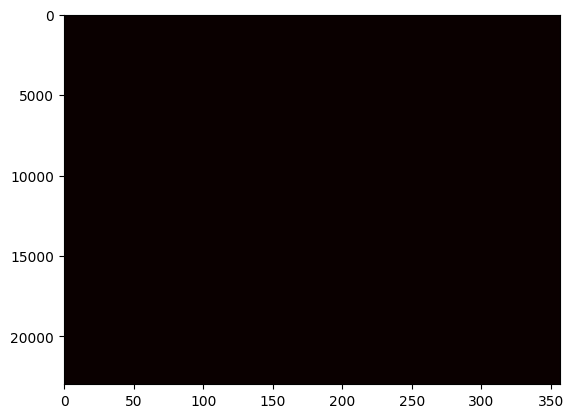

In [ ]:
# Create a visual to view missing values
plt.imshow(df.isnull(), cmap='hot', aspect='auto')
plt.show()

From the chart above there are no missing values.

### **Exploratory data Analysis**

In [ ]:
# Obtain summarry statistics
df.describe()

,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
count,22975.000000,22975.000000,22975.000000,22975.000000,22975.000000,22975.000000,22975.000000,22975.000000,22975.000000,22975.000000,...,22975.000000,22975.000000,22975.000000,22975.000000,22975.000000,22975.000000,22975.000000,22975.000000,22975.000000,22975.000000
mean,2302.597171,23028.971708,5715.185610,1.238955,54.468988,3.498368,10.328400,3.111164,1.367791,0.738629,...,3.055321,3.620022,3.647095,3.651273,1.859935,6.670729,6.603395,6.671425,2.771665,2.792644
std,1328.749586,13287.495936,4966.430219,0.426455,16.189081,1.556147,2.815743,1.026125,0.482215,1.108022,...,1.528703,1.829824,1.880664,1.822568,0.803743,3.669262,3.573612,3.560253,1.187083,1.180095
min,1.000000,11.000000,2.754882,1.000000,18.000000,1.000000,-1.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1152.000000,11524.500000,1850.200822,1.000000,42.000000,2.000000,8.000000,2.000000,1.000000,0.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,3.000000,4.000000,2.000000,2.000000
50%,2303.000000,23033.000000,4083.825044,1.000000,56.000000,4.000000,11.000000,3.000000,1.000000,0.000000,...,3.000000,4.000000,4.000000,4.000000,2.000000,7.000000,7.000000,7.000000,3.000000,3.000000
75%,3454.000000,34541.500000,8746.732248,1.000000,67.000000,5.000000,12.000000,4.000000,2.000000,1.000000,...,5.000000,6.000000,6.000000,6.000000,3.000000,10.000000,10.000000,10.000000,4.000000,4.000000
max,4603.000000,46035.000000,28265.283116,2.000000,95.000000,6.000000,14.000000,4.000000,2.000000,10.000000,...,5.000000,6.000000,6.000000,6.000000,3.000000,12.000000,12.000000,12.000000,4.000000,4.000000


In [ ]:
# Calculate the proportion of business owners (in 'HBUS') as percentages
prop_biz_owners = df['HBUS'].value_counts(normalize =True).mul(100).round()
print('Proportion of business owners present in data')
prop_biz_owners

Proportion of business owners present in data


,proportion
HBUS,
0,72.0
1,28.0


Per the data there are about 28% families that own business.

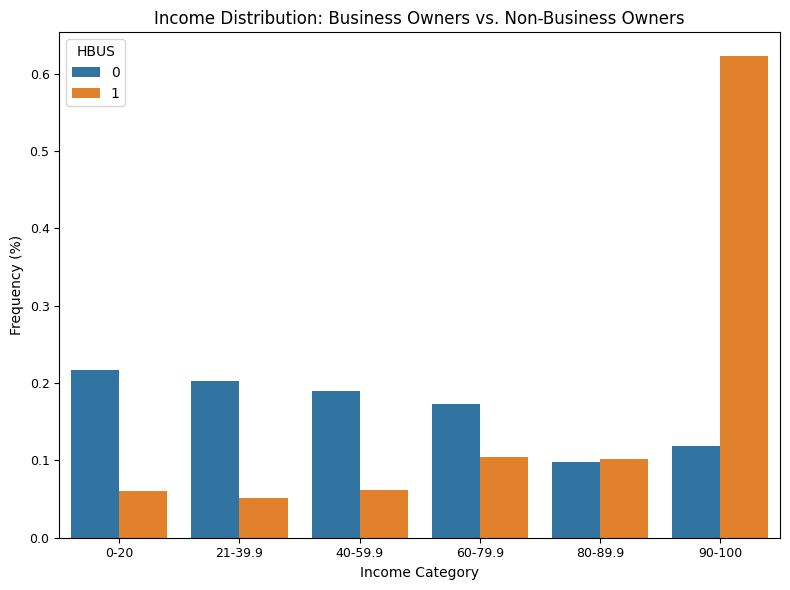

In [ ]:
# Create a dictionary to categorize income ranges for 'INCCAT'
inccat_dict = {
    1: "0-20",
    2: "21-39.9",
    3: "40-59.9",
    4: "60-79.9",
    5: "80-89.9",
    6: "90-100",
}

# Replace values in 'INCCAT' based on the dictionary, group by 'HBUS', calculate normalized frequencies
df_inccat = (
    df.INCCAT
    .replace(inccat_dict)
    .groupby(df['HBUS'])
    .value_counts(normalize=True)
    .rename('frequency')
    .to_frame()
    .reset_index()
)

# Create bar plot
plt.figure(figsize=(8, 6))  # Optional: Adjust figure size
sns.barplot(
    x='INCCAT',
    y='frequency',
    hue='HBUS',
    data=df_inccat,
    order=inccat_dict.values()
)

# Customize the appearance with smaller fonts
plt.xlabel("Income Category", fontsize=10)
plt.ylabel("Frequency (%)", fontsize=10)
plt.title("Income Distribution: Business Owners vs. Non-Business Owners", fontsize=12)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

# Show the plot
plt.tight_layout()
plt.show()


As seen from the chart above majority of business owners' earn incomes more than 50th percentile and the ooposite is true for non business owners.

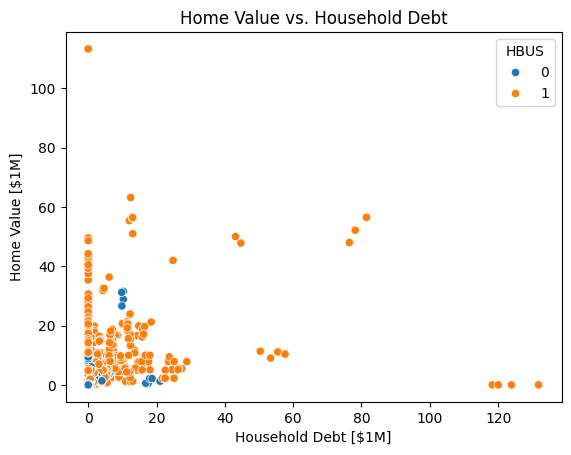

In [ ]:
# Visualize the income distribution
sns.scatterplot(x=df.DEBT/1e6, y=df.HOUSES/1e6, hue = df.HBUS)
plt.xlabel("Household Debt [$1M]")
plt.ylabel("Home Value [$1M]")
plt.title("Home Value vs. Household Debt")
plt.show()



```
# This is formatted as code
```

Non business owners have house debts less or around 20 million with business owners having debts stretching from zero to over 120 million USD.

## **Focusing on Medium to Big Business Owners (Families who own businesses and make an income of more than 500000 USD a year)**

In [ ]:
# Filter data for small businesses
mask = (df['HBUS']==1) & (df['INCOME'] > 500000)
df_small_biz = df[mask]
print(f'There are {df_small_biz.shape[0]} rows and {df_small_biz.shape[1]} columns')
df_small_biz.head()

There are 3066 rows and 357 columns


,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
30,7,71,58.669076,1,52,3,13,4,1,1,...,5,6,6,6,3,12,12,12,4,4
31,7,72,57.863399,1,52,3,13,4,1,1,...,5,6,6,6,3,12,12,12,4,4
32,7,73,58.182721,1,52,3,13,4,1,1,...,5,6,6,6,3,12,12,12,4,4
33,7,74,59.451973,1,52,3,13,4,1,1,...,5,6,6,6,3,12,12,12,4,4
34,7,75,59.198871,1,52,3,13,4,1,1,...,5,6,6,6,3,12,12,12,4,4


In [ ]:
# summarry stats
df_small_biz.describe()

,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
count,3066.000000,3066.000000,3066.000000,3066.000000,3066.000000,3066.000000,3066.000000,3066.000000,3066.000000,3066.000000,...,3066.000000,3066.0,3066.000000,3066.00000,3066.000000,3066.000000,3066.000000,3066.000000,3066.0,3066.000000
mean,2316.184605,23164.840835,772.442504,1.021526,62.866928,4.309198,12.428898,3.833986,1.088063,0.592629,...,4.989889,6.0,5.989889,5.98304,2.989237,11.677756,11.712981,11.688193,4.0,3.994129
std,1344.444608,13444.448502,1416.201451,0.145155,11.525526,1.148782,1.610629,0.496808,0.283432,1.027548,...,0.118013,0.0,0.118013,0.17242,0.103203,0.629255,0.452444,0.615703,0.0,0.076409
min,7.000000,71.000000,2.754882,1.000000,26.000000,1.000000,2.000000,1.000000,1.000000,0.000000,...,2.000000,6.0,3.000000,3.00000,2.000000,3.000000,11.000000,6.000000,4.0,3.000000
25%,1127.000000,11274.000000,51.870431,1.000000,56.000000,4.000000,12.000000,4.000000,1.000000,0.000000,...,5.000000,6.0,6.000000,6.00000,3.000000,11.000000,11.000000,11.000000,4.0,4.000000
50%,2360.000000,23601.500000,130.647527,1.000000,63.000000,4.000000,13.000000,4.000000,1.000000,0.000000,...,5.000000,6.0,6.000000,6.00000,3.000000,12.000000,12.000000,12.000000,4.0,4.000000
75%,3495.250000,34955.250000,718.905529,1.000000,71.000000,5.000000,14.000000,4.000000,1.000000,1.000000,...,5.000000,6.0,6.000000,6.00000,3.000000,12.000000,12.000000,12.000000,4.0,4.000000
max,4599.000000,45995.000000,13222.179762,2.000000,95.000000,6.000000,14.000000,4.000000,2.000000,6.000000,...,5.000000,6.0,6.000000,6.00000,3.000000,12.000000,12.000000,12.000000,4.0,4.000000


### **Feature Selection**
Due to an enormous amount of features including categorical and numerical features, we select some numerical variables to work with giving that K-means works well with numerical data.
A criterion for selecting the features is to use features exhibiting high variance or spreads. Features that tends to exhibit an appreciable amount of spread tends to give well defined clusters compared to those with relatively minimal spread. Also, since K-means is centroid-based and employs average calculations as a tool to locate centroids it tends to be very sensitive to outliers. Hence some standardisation and or normalisation of data will be required. To handle the issues of outliers we trim the variance to the middle 80% of the data.

In [ ]:
# Calculate variance, get 10 largest features
top_ten_var = df_small_biz.var().sort_values().tail(10)
top_ten_var

,0
KGBUS,1.494285e+16
EQUITY,1.575785e+16
ACTBUS,1.621517e+16
KGTOTAL,2.020798e+16
FIN,2.118707e+16
BUS,2.217685e+16
NHNFIN,2.700711e+16
NFIN,2.800177e+16
NETWORTH,6.377374e+16
ASSET,6.460712e+16


In [ ]:
# Calculate trimmed variance
top_ten_trim_var = df_small_biz.apply(trimmed_var, limits=(0.1,0.1)).sort_values().tail(15)

In [ ]:
# Create horizontal bar chart of `top_ten_trim_var`
fig = px.bar(
    x=top_ten_trim_var,
    y =top_ten_trim_var.index,
    title='Medium to Big Business Owners: High Variance Features'
)
fig.update_layout(xaxis_title ='Trimmed Variance [$]',yaxis_title='Feature')
fig.show()

In [ ]:
# Extract the names of the top 15 tim vriance faetures
high_var_cols = top_ten_trim_var.tail(15).index.to_list()
high_var_cols

['INCOME',
 'STOCKS',
 'NONACTBUS',
 'NMMF',
 'DEQ',
 'EQUITY',
 'FIN',
 'ACTBUS',
 'KGBUS',
 'KGTOTAL',
 'BUS',
 'NHNFIN',
 'NFIN',
 'NETWORTH',
 'ASSET']

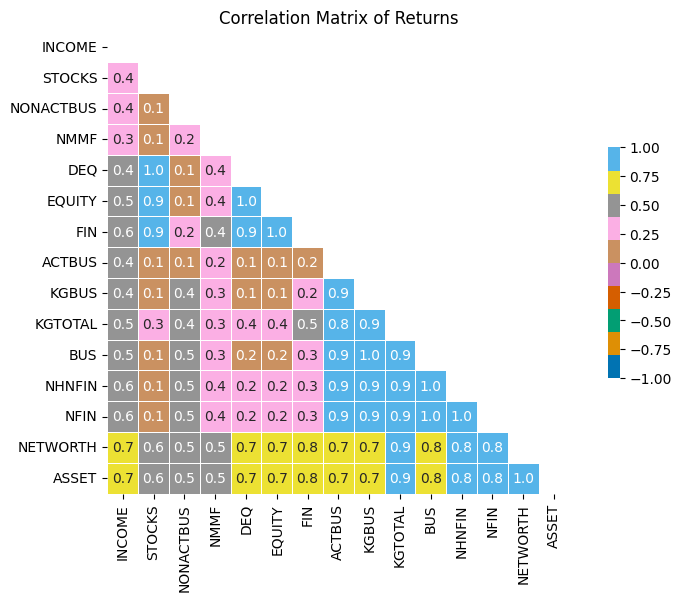

In [ ]:
# Calculate the correlation matrix for selected features
corr_matrix = df_small_biz[high_var_cols].corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 6))

# Generate a colorblind-friendly colormap
cmap = sns.color_palette("colorblind", as_cmap=True)

# Draw the heatmap for returns with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".1f")
ax.set_title('Correlation Matrix of Returns')

# Show plot
plt.show()

Features have no to small to medium to strong to perfect corelation.

### **The model: Running K-means**

In [ ]:
# Extract required features
high_var_cols = top_ten_trim_var.tail(10).index.to_list()
X = df_small_biz[high_var_cols]

# Train model and calculate inertia, silhouette score.
n_clusters = range(2,13)
inertia_errors = []
silhouette_scores = []

# Add `for` loop to train model and calculate inertia, silhouette score.
for k in n_clusters:
    # Build model
    model= make_pipeline(StandardScaler(), KMeans(n_clusters =k, n_init=20, random_state=42))
    # Train model
    model.fit(X)
    # Calculate inertia
    inertia_errors.append(model.named_steps['kmeans'].inertia_)
    # Calculate Silhouette Score
    silhouette_scores.append(silhouette_score(X,model.named_steps['kmeans'].labels_))

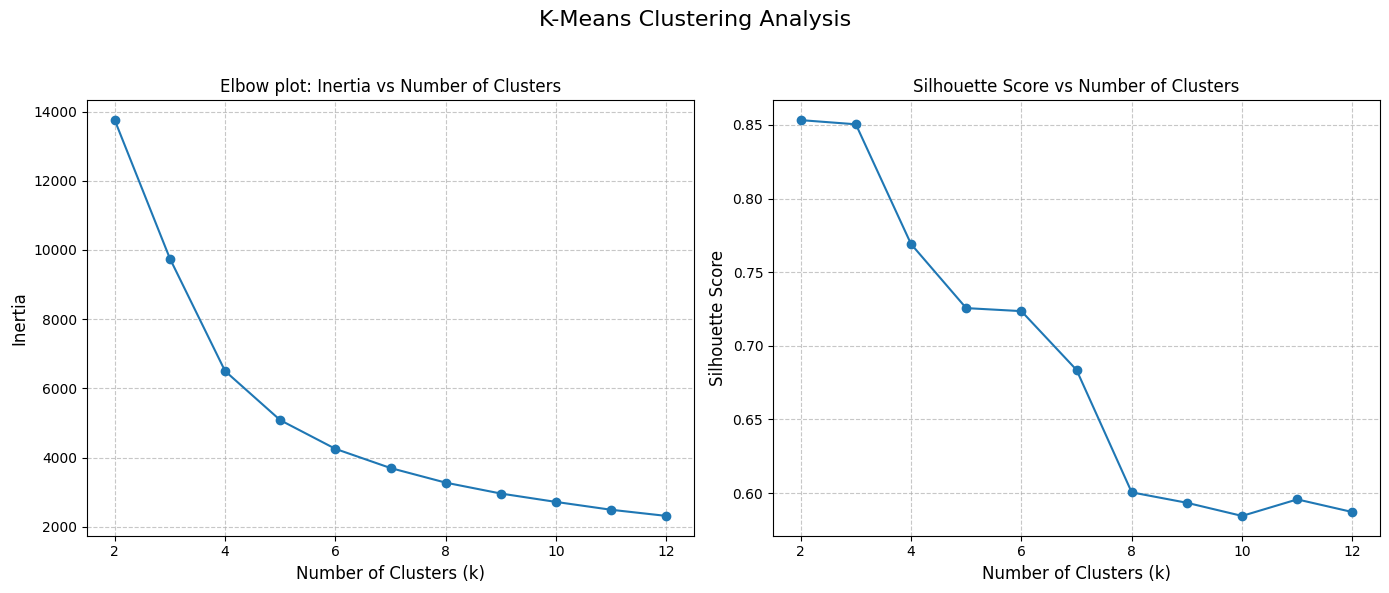

In [ ]:
# Create a figure with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))  # Adjust the figure size as needed

# General title for the entire figure
fig.suptitle('K-Means Clustering Analysis', fontsize=16)

# Plot 1: Elbow plot: Inertia vs Number of Clusters
ax1.plot(n_clusters, inertia_errors, marker='o')
ax1.set_title('Elbow plot: Inertia vs Number of Clusters', fontsize=12)
ax1.set_xlabel('Number of Clusters (k)', fontsize=12)
ax1.set_ylabel('Inertia', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.7)

# Plot 2: Silhouette Score vs Number of Clusters
ax2.plot(n_clusters, silhouette_scores, marker='o')
ax2.set_title('Silhouette Score vs Number of Clusters', fontsize=12)
ax2.set_xlabel('Number of Clusters (k)', fontsize=12)
ax2.set_ylabel('Silhouette Score', fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.7)

# Adjust spacing to avoid overlap and improve layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space at the top for the suptitle

# Show the plots
plt.show()

From the charts above the elbow plot indicate an optimal of 6 clusters and the Silhouette plot shows that the optimal number of cluster for this dataset is possibly 3 or 7 given the high silhoutte scores recorded. However, we go for an optimal of 6 clusters since 3 might be potentially too small and 7 too much.

In [ ]:
# Final model
final_model = make_pipeline(
    StandardScaler(),
    KMeans(n_clusters=6, n_init=20, random_state=42)
)
final_model.fit(X)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=6, n_init=20, random_state=42))])

In [ ]:
# Extract cluster labels
labels = final_model.named_steps['kmeans'].labels_

# Obtain mean values
xgb = X.groupby(labels).mean()

# Check number of data points in each cluster
member_count= X.groupby(labels).count()
member_count

,EQUITY,FIN,ACTBUS,KGBUS,KGTOTAL,BUS,NHNFIN,NFIN,NETWORTH,ASSET
0,2556,2556,2556,2556,2556,2556,2556,2556,2556,2556
1,23,23,23,23,23,23,23,23,23,23
2,46,46,46,46,46,46,46,46,46,46
3,96,96,96,96,96,96,96,96,96,96
4,10,10,10,10,10,10,10,10,10,10
5,335,335,335,335,335,335,335,335,335,335


In [ ]:
# Create side-by-side bar chart of `xgb`
fig = px.bar(
    xgb,
    barmode ='group',
    title ='Medium to Big Business Owner Finances by Cluster'
)
fig.update_layout(xaxis_title ='Cluster', yaxis_title ='Value [$]')
fig.show()

The clusters created by K-means are distinct and showing distinct patterns. Those in cluster 4 are characterize by tremendous networth and assets and own huge amount of Equities. Those in cluster 0 are characterized with the lowest values among all features. Cluster 5 in terms of mean values of the features are a bit higher than that of cluster 0. Cluster 2 owns an appreciable amount of equities compared to cluster 0, 3 and 5.However, their networth and asset are almost same value as cluster 1.

### **Visualising the clusters**
The ability of Principal components to visualize high-dimensional data in lower dimensions is exploited here are in the visualisation of the clusters created. A scree plot is generated to explained the amount of variaation explained and contributed by each component.

[31-08-2025 13:37:53] [pca.pca] [INFO] n_components is set to 9
[31-08-2025 13:37:53] [pca.pca] [INFO] Extracting column labels from dataframe.
[31-08-2025 13:37:53] [pca.pca] [INFO] Extracting row labels from dataframe.
[31-08-2025 13:37:53] [pca.pca] [INFO] Normalizing input data per feature (zero mean and unit variance)..
[31-08-2025 13:37:53] [pca.pca] [INFO] The PCA reduction is performed on the 10 columns of the input dataframe.
[31-08-2025 13:37:53] [pca.pca] [INFO] Fit using PCA.
[31-08-2025 13:37:53] [pca.pca] [INFO] Compute loadings and PCs.
[31-08-2025 13:37:53] [pca.pca] [INFO] Compute explained variance.
[31-08-2025 13:37:53] [pca.pca] [INFO] Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[9]
[31-08-2025 13:37:55] [pca.pca] [INFO] Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[31-08-2025 13:37:55] [pca.pca] [INFO] Outlier detection using SPE/DmodX with n_std=[3]


(<Figure size 800x600 with 1 Axes>,
 <Axes: title={'center': 'Cumulative explained variance\n 9 Principal Components explain [100.0%] of the variance.'}, xlabel='Principal Component', ylabel='Percentage explained variance'>)

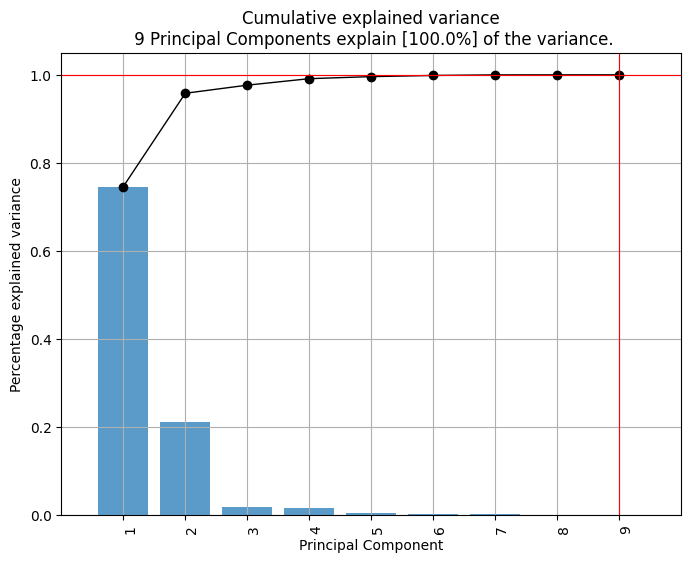

In [ ]:
# Instantiate transformer
model = pca(normalize =True, n_components=None,random_state=42)

# Transform `X`
X_t = model.fit_transform(X)

# Scree plot showing explain variance
model.plot(figsize=(8,6))

The scree plot above helps us see the percentage of variance captured by all the Pricipal components. Using the first,second component and 3rd component captures about 80% of the variations in the feature. Hence we can plot the 10 features using just PC1 and PC2.
 .

In [ ]:
# Instantiate transformer
pca = PCA(n_components=2,random_state=42)

# Transform `X`
X_t = pca.fit_transform(X)

# Put `X_t` into DataFrame
X_pca = pd.DataFrame(X_t, columns=['PC1','PC2'])
# Create scatter plot of `PC2` vs `PC1`
fig = px.scatter(
    data_frame = X_pca,
    x='PC1',
    y='PC2',
    color =labels.astype(str),
    title ='PCA Representation of Clusters'
)
fig.update_layout(xaxis_title ='PC1', yaxis_title ='PC2')
fig.show()

## **Demonstrating the use of Principal Component as a Dimensionality Reduction Technique for Feature Extraction for K-means clustering**

This section we employed Principal Component Analysis as a dimensionality reduction tool and proceeded to use it for feature extraction for the 2024 Survey of Consumer Finance data for th subset of medium to big business owners where we subset to the top 10 trim variance and then we re-implemented the K-means clustering algorithm but this time we tried to fine tune hyperparameters like the number of clusters, the number of initialisation and the initialisation method.

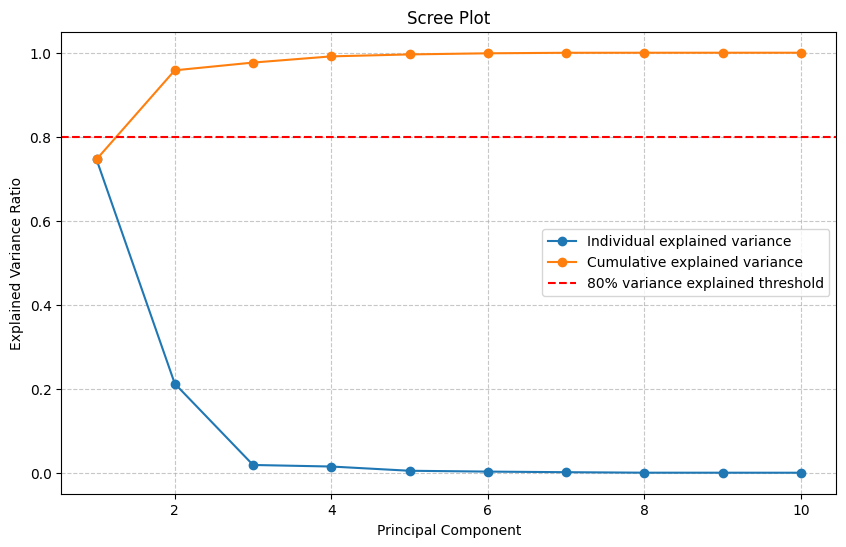

Number of components explaining >=80% variance: 2


In [ ]:
# Extract required features
high_var_cols = top_ten_trim_var.tail(10).index.to_list()
X = df_small_biz[high_var_cols]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
model_pca = PCA()
X_pca_full = model_pca.fit_transform(X_scaled)

# Calculate cumulative variance explained by each PC
explained_variance_ratio = model_pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot Scree plot (explained variance by each PC)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', label='Individual explained variance')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', label='Cumulative explained variance')
plt.axhline(y=0.80, color='r', linestyle='--', label='80% variance explained threshold')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Select number of components that explain at least 80% of variance
n_components = np.argmax(cumulative_variance >= 0.80) + 1
print(f'Number of components explaining >=80% variance: {n_components}')

From the scree plot above PC1 to PC6 total variance is almost 100% with PC1 and PC2 explaining chunk of the variations over 95%. This means we can represent the data with PC1 and PC2.

### **Running K-means with Principal Components**

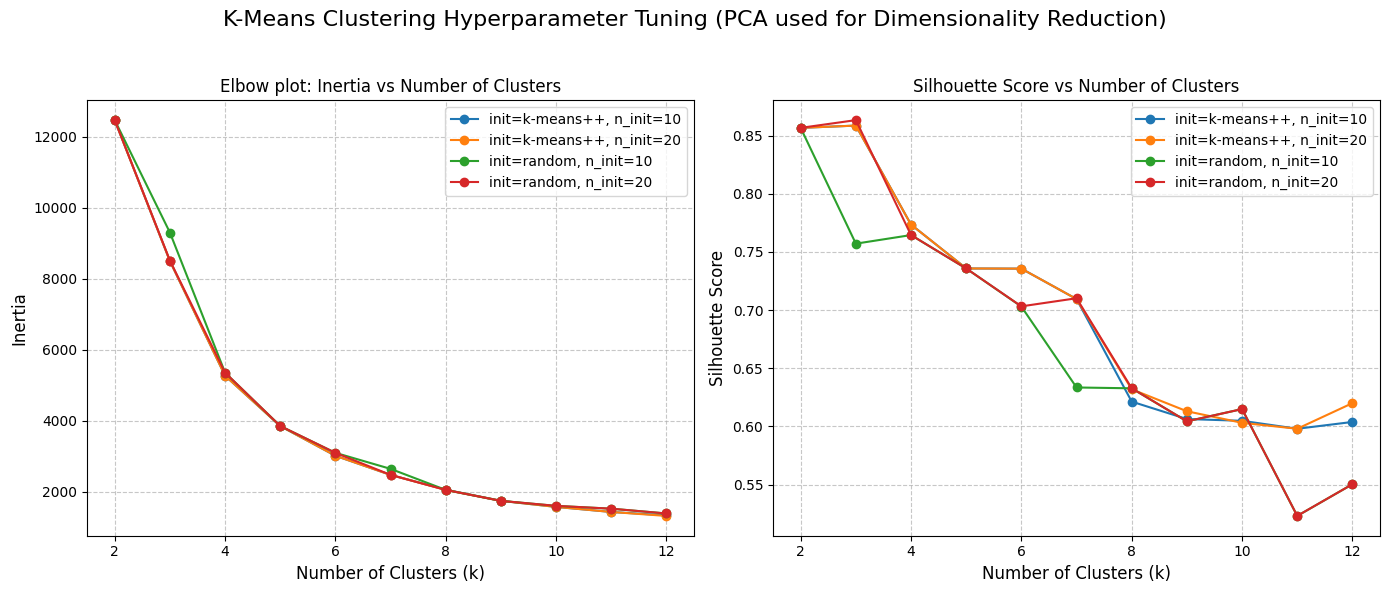

In [ ]:
# Reduce data to the selected number of PCs
pca_reduced = PCA(n_components=n_components)
X_pca = pca_reduced.fit_transform(X_scaled)


# Perform K-means clustering on the reduced dataset and tune hyperparameters
n_clusters = range(2, 13)
inits = ['k-means++', 'random']
n_inits = [10, 20]

inertia_errors = {}
silhouette_scores = {}

# Tune hyperparameters using nested loops
for init in inits:
    for n_init in n_inits:
        inertia_errors[(init, n_init)] = []
        silhouette_scores[(init, n_init)] = []
        for k in n_clusters:
            # Build and train K-Means model on the PCA-reduced dataset
            model = KMeans(n_clusters=k, init=init, n_init=n_init, random_state=42)
            model.fit(X_pca)

            # Calculate inertia and silhouette score
            inertia_errors[(init, n_init)].append(model.inertia_)
            silhouette_scores[(init, n_init)].append(silhouette_score(X_pca, model.labels_))

# Plot results for all combinations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('K-Means Clustering Hyperparameter Tuning (PCA used for Dimensionality Reduction)', fontsize=16)

# Plot 1: Elbow plot for each init/n_init combination
for key in inertia_errors:
    init, n_init = key
    label = f"init={init}, n_init={n_init}"
    ax1.plot(n_clusters, inertia_errors[key], marker='o', label=label)
ax1.set_title('Elbow plot: Inertia vs Number of Clusters', fontsize=12)
ax1.set_xlabel('Number of Clusters (k)', fontsize=12)
ax1.set_ylabel('Inertia', fontsize=12)
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.7)

# Plot 2: Silhouette Score for each init/n_init combination
for key in silhouette_scores:
    init, n_init = key
    label = f"init={init}, n_init={n_init}"
    ax2.plot(n_clusters, silhouette_scores[key], marker='o', label=label)
ax2.set_title('Silhouette Score vs Number of Clusters', fontsize=12)
ax2.set_xlabel('Number of Clusters (k)', fontsize=12)
ax2.set_ylabel('Silhouette Score', fontsize=12)
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.7)

# Adjust layout and show plots
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

From the charts above, The elbow plot is showing 4 and 6 as the optimal. That is the inertia decreases sharply and begins to flatten at cluster 4 or say 6.  The silhoutte is recording high score for cluster of 2, 3, 4, 6 and 7 depending on the combination of initialisation method and number of initialisation.However, for this real-world data, a cluster of 2 might be too simple. The combination of the random initialization method and the 20 number of initialisation is not stable. Based on these we say the best parameters are a combination of the K-means+++ initialization method with 20 number of initialisations an optimal of 6 clusters.

In [ ]:
# Final model with chosen hyperparameters
final_model = KMeans(n_clusters=6, init='k-means++', n_init=20, random_state=42)
final_model.fit(X_pca)

# Extract cluster labels
labels = final_model.labels_

# Obtain mean values for each cluster in original feature space
xgb = X.groupby(labels).mean()
# Check number of data points in each cluster
member_count = X.groupby(labels).count()
print()
member_count

,EQUITY,FIN,ACTBUS,KGBUS,KGTOTAL,BUS,NHNFIN,NFIN,NETWORTH,ASSET
0,2556,2556,2556,2556,2556,2556,2556,2556,2556,2556
1,96,96,96,96,96,96,96,96,96,96
2,10,10,10,10,10,10,10,10,10,10
3,46,46,46,46,46,46,46,46,46,46
4,335,335,335,335,335,335,335,335,335,335
5,23,23,23,23,23,23,23,23,23,23


The cluster membership composition and cardinality is the same as previous ilustration.

In [ ]:
# Create side-by-side bar chart of xgb
fig = px.bar(
    xgb,
    barmode='group',
    title='Small Business Owner Finances by Cluster'
)
fig.update_layout(xaxis_title='Cluster', yaxis_title='Value [$]')
fig.show()

# PCA visualization for clusters
pca_viz = PCA(n_components=2)
X_pca_viz = pca_viz.fit_transform(X_pca)

*The* cluster attributes looks similar to the previous.

In [ ]:
# Create scatter plot of PC2 vs PC1 with clusters
X_pca_df = pd.DataFrame(X_pca_viz, columns=['PC1', 'PC2'])
fig = px.scatter(
    data_frame=X_pca_df,
    x='PC1',
    y='PC2',
    color=labels.astype(str),
    title='PCA Representation of Clusters (PCA-Reduced Data)'
)
fig.update_layout(xaxis_title='PC1', yaxis_title='PC2')
fig.show()